In [1]:
var openDigger = require('../src/open_digger');
var year = 2024, startMonth = 1, endMonth = 12, startYear = 2020
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2018, 2019, 2020, 2021, 2022]
var baseOptions = {
    startYear, endYear: year,
    startMonth, endMonth,
    groupTimeRange: 'year',
    order: 'DESC'
};

## 基金会洞察

### 全球基金会旗下项目OpenRank Top 10

In [2]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: ['Foundation'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬────────────┬──────────┬──────────────────────────────────┬─────────────┐
│ (index) │     id     │ platform │               name               │  openrank   │
├─────────┼────────────┼──────────┼──────────────────────────────────┼─────────────┤
│    0    │ '4542716'  │ 'GitHub' │         'NixOS/nixpkgs'          │ [ 23345.3 ] │
│    1    │ '59771425' │ 'GitHub' │   'zephyrproject-rtos/zephyr'    │ [ 8445.03 ] │
│    2    │ '10919030' │ 'Gitee'  │        'openharmony/docs'        │ [ 7920.28 ] │
│    3    │ '15634981' │ 'GitHub' │       'godotengine/godot'        │ [ 7666.04 ] │
│    4    │ '16184969' │ 'Gitee'  │ 'openharmony/graphic_graphic_2d' │ [ 4134.13 ] │
│    5    │ '81598961' │ 'GitHub' │         'python/cpython'         │ [ 4124.69 ] │
│    6    │ '16184957' │ 'Gitee'  │  'openharmony/arkui_ace_engine'  │ [ 4031.73 ] │
│    7    │ '99919302' │ 'GitHub' │          'apache/doris'          │ [ 3965.48 ] │
│    8    │ '20580498' │ 'GitHub' │     'kubernetes/kubernetes'  

In [3]:
var processFoundationFieldData = (label, title) => {
    var years = [2020, 2021, 2022, 2023, 2024];
    openDigger.index.openrank.getRepoOpenrank({
        ...baseOptions, labelIntersect: label, limit: 20
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `OpenRank of ${title} 2020-2024`});
    });
};

### 全球基金会旗下项目OpenRank Top 10 变化趋势

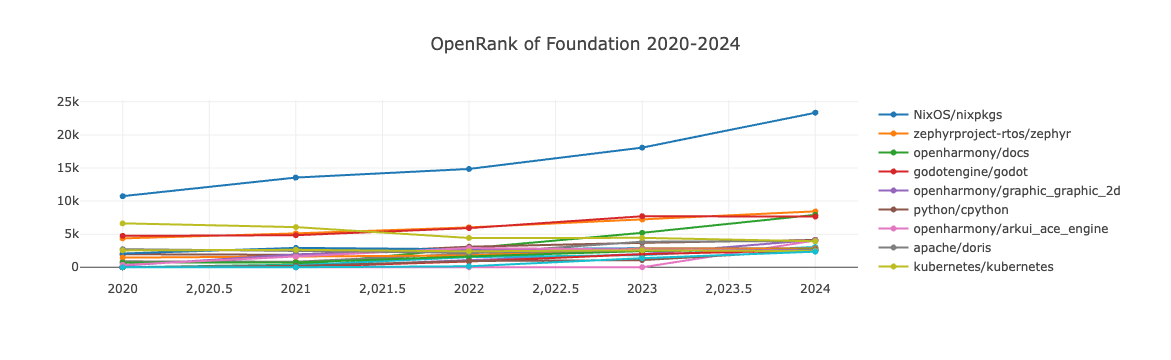

In [4]:
processFoundationFieldData(['Foundation'], 'Foundation');

### 各基金会 OpenRank 变化趋势

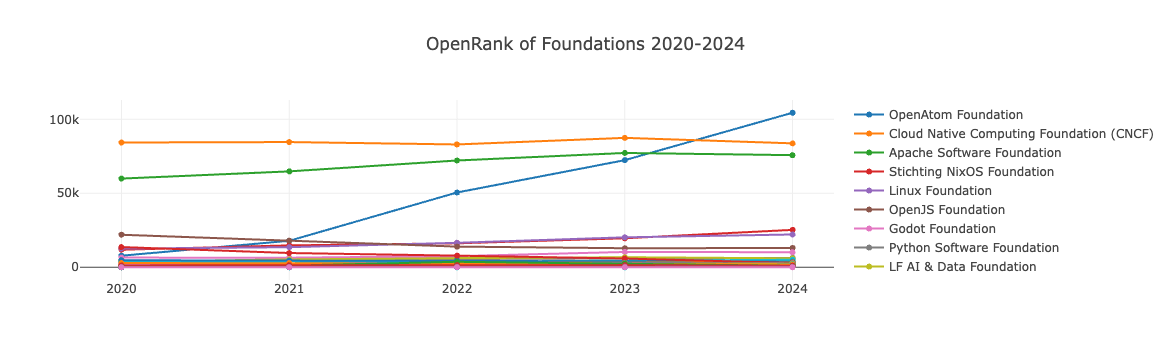

In [5]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations'],
    startYear: 2020, endYear: 2024, endMonth: 12,
    groupBy: 'Foundation',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    var data = data.filter(i => i.id.startsWith(':foundations'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of Foundations 2020-2024`, xaxis: { type: 'category' }});
})

### 中国基金会旗下项目OpenRank Top 10

In [6]:
openDigger.index.openrank.getRepoOpenrank({
    labelIntersect: [':regions/CN', 'Foundation'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────────────┬─────────────┐
│ (index) │     id      │ platform │                  name                  │  openrank   │
├─────────┼─────────────┼──────────┼────────────────────────────────────────┼─────────────┤
│    0    │ '10919030'  │ 'Gitee'  │           'openharmony/docs'           │ [ 7920.28 ] │
│    1    │ '16184969'  │ 'Gitee'  │    'openharmony/graphic_graphic_2d'    │ [ 4134.13 ] │
│    2    │ '16184957'  │ 'Gitee'  │     'openharmony/arkui_ace_engine'     │ [ 4031.73 ] │
│    3    │ '99919302'  │ 'GitHub' │             'apache/doris'             │ [ 3965.48 ] │
│    4    │ '11218621'  │ 'Gitee'  │         'openharmony/xts_acts'         │ [ 3069.22 ] │
│    5    │ '16184977'  │ 'Gitee'  │     'openharmony/interface_sdk-js'     │ [ 2576.2 ]  │
│    6    │ '16184960'  │ 'Gitee'  │  'openharmony/communication_dsoftbus'  │ [ 2552.72 ] │
│    7    │  '7696525'  │ 'Gitee'  │           'openeuler/kernel'           │ [ 

### 中国基金会旗下项目OpenRank Top 10 变化趋势

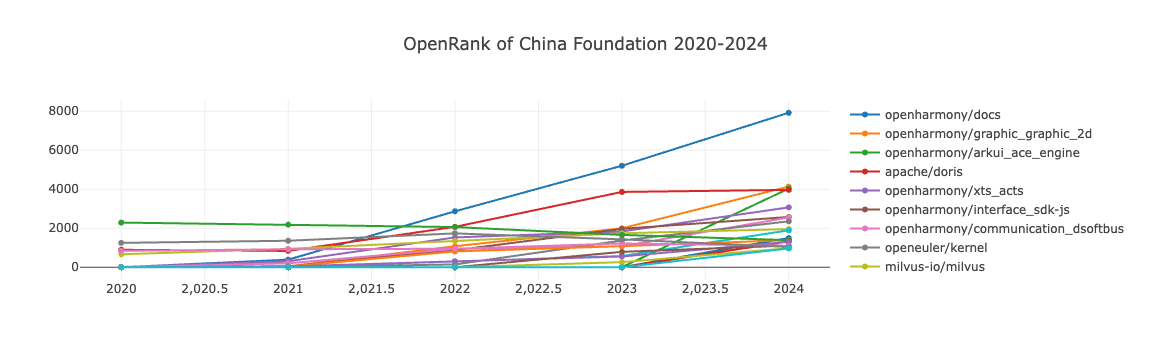

In [7]:
processFoundationFieldData([':regions/CN', 'Foundation'], 'China Foundation');

## 各基金会旗下项目OpenRank TOP 10 榜单

### CNCF

In [8]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/linux_foundation/cncf'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬──────────────────────────────────────────────────┬─────────────┐
│ (index) │     id      │ platform │                       name                       │  openrank   │
├─────────┼─────────────┼──────────┼──────────────────────────────────────────────────┼─────────────┤
│    0    │ '20580498'  │ 'GitHub' │             'kubernetes/kubernetes'              │ [ 3924.93 ] │
│    1    │ '48109239'  │ 'GitHub' │                 'cilium/cilium'                  │ [ 2842.98 ] │
│    2    │ '11125589'  │ 'GitHub' │               'keycloak/keycloak'                │ [ 2687.79 ] │
│    3    │ '236095576' │ 'GitHub' │              'backstage/backstage'               │ [ 2573.87 ] │
│    4    │ '65214191'  │ 'GitHub' │                'envoyproxy/envoy'                │ [ 2431.95 ] │
│    5    │ '51478266'  │ 'GitHub' │               'kubernetes/website'               │ [ 2238.74 ] │
│    6    │ '196414933' │ 'GitHub' │ 'open-telemetry/opentelemetry-collector-contr

### lfai

In [9]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/linux_foundation/lfai'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬───────────────────────────┬─────────────┐
│ (index) │     id      │ platform │           name            │  openrank   │
├─────────┼─────────────┼──────────┼───────────────────────────┼─────────────┤
│    0    │ '208728772' │ 'GitHub' │    'milvus-io/milvus'     │ [ 1955.52 ] │
│    1    │ '182849188' │ 'GitHub' │     'delta-io/delta'      │ [ 845.73 ]  │
│    2    │ '216628419' │ 'GitHub' │     'flyteorg/flyte'      │ [ 634.85 ]  │
│    3    │ '203634431' │ 'GitHub' │    'flyteorg/flytekit'    │ [ 494.36 ]  │
│    4    │ '182067506' │ 'GitHub' │     'kedro-org/kedro'     │ [ 374.19 ]  │
│    5    │ '178075572' │ 'GitHub' │      'kserve/kserve'      │ [ 370.36 ]  │
│    6    │ '241400276' │ 'GitHub' │     'onnx/onnx-mlir'      │ [ 354.37 ]  │
│    7    │ '258933250' │ 'GitHub' │    'delta-io/delta-rs'    │ [ 352.64 ]  │
│    8    │ '161133770' │ 'GitHub' │     'feast-dev/feast'     │ [ 342.22 ]  │
│    9    │ '306977038' │ 'GitHub' │ 'OpenLineage/Op

### OpenAtom

In [10]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/openatom'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,groupBy: 'Project',
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬────────────────────────────────────┬──────────┬───────────────┬──────────────┐
│ (index) │                 id                 │ platform │     name      │   openrank   │
├─────────┼────────────────────────────────────┼──────────┼───────────────┼──────────────┤
│    0    │  ':companies/huawei/openharmony'   │  'All'   │ 'OpenHarmony' │ [ 67975.58 ] │
│    1    │   ':companies/huawei/openeuler'    │  'All'   │  'openEuler'  │ [ 24874.03 ] │
│    2    │    ':companies/alibaba/anolis'     │  'All'   │  'Anolis OS'  │ [ 4436.64 ]  │
│    3    │  ':companies/openkylin/openkylin'  │  'All'   │  'openKylin'  │ [ 4258.34 ]  │
│    4    │    ':foundations/openatom/taro'    │  'All'   │    'Taro'     │  [ 628.48 ]  │
│    5    │    ':foundations/openatom/ubml'    │  'All'   │    'UBML'     │  [ 418.35 ]  │
│    6    │     ':companies/360/pikiwidb'      │  'All'   │  'PikiwiDB'   │  [ 299.21 ]  │
│    7    │ ':foundations/openatom/open_solon' │  'All'   │  'OpenSolon'  │  [ 184.84 ]  │

### Apache

In [11]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/apache'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────┬─────────────┐
│ (index) │     id      │ platform │        name         │  openrank   │
├─────────┼─────────────┼──────────┼─────────────────────┼─────────────┤
│    0    │ '99919302'  │ 'GitHub' │   'apache/doris'    │ [ 3965.48 ] │
│    1    │ '33884891'  │ 'GitHub' │  'apache/airflow'   │ [ 2867.69 ] │
│    2    │ '17165658'  │ 'GitHub' │   'apache/spark'    │ [ 2485.28 ] │
│    3    │  '2211243'  │ 'GitHub' │   'apache/kafka'    │ [ 2045.68 ] │
│    4    │ '39464018'  │ 'GitHub' │  'apache/superset'  │ [ 1695.89 ] │
│    5    │ '51905353'  │ 'GitHub' │   'apache/arrow'    │ [ 1602.44 ] │
│    6    │ '358917318' │ 'GitHub' │ 'apache/datafusion' │ [ 1446.31 ] │
│    7    │ '228103273' │ 'GitHub' │   'apache/nuttx'    │ [ 1423.35 ] │
│    8    │ '20587599'  │ 'GitHub' │   'apache/flink'    │ [ 1390.9 ]  │
│    9    │ '50904245'  │ 'GitHub' │    'apache/beam'    │ [ 1374.39 ] │
└─────────┴─────────────┴──────────┴───────────────

### Eclipse

In [12]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/eclipse'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬──────────────────────────────────┬────────────┐
│ (index) │     id      │ platform │               name               │  openrank  │
├─────────┼─────────────┼──────────┼──────────────────────────────────┼────────────┤
│    0    │ '53077478'  │ 'GitHub' │          'eclipse/omr'           │ [ 164.79 ] │
│    1    │ '15237269'  │ 'GitHub' │          'eclipse/kura'          │ [ 152.37 ] │
│    2    │ '70921758'  │ 'GitHub' │         'eclipse/kapua'          │ [ 131.97 ] │
│    3    │ '35426931'  │ 'GitHub' │       'eclipse/dirigible'        │ [ 127.2 ]  │
│    4    │ '45860898'  │ 'GitHub' │        'eclipse/hawkbit'         │ [ 120.21 ] │
│    5    │  '1553758'  │ 'GitHub' │         'eclipse/xtext'          │ [ 109.38 ] │
│    6    │ '53614190'  │ 'GitHub' │       'eclipse/mosquitto'        │ [ 80.88 ]  │
│    7    │ '161500892' │ 'GitHub' │ 'eclipse/microprofile-marketing' │ [ 80.43 ]  │
│    8    │ '259645903' │ 'GitHub' │      'eclipse/kiso-testing' 

### OpenInfra

In [13]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/openinfra'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬─────────────────────────────────────────────┬────────────┐
│ (index) │     id      │ platform │                    name                     │  openrank  │
├─────────┼─────────────┼──────────┼─────────────────────────────────────────────┼────────────┤
│    0    │ '113404957' │ 'GitHub' │      'kata-containers/kata-containers'      │ [ 825.13 ] │
│    1    │ '113113705' │ 'GitHub' │         'kata-containers/community'         │ [ 25.71 ]  │
│    2    │  '5320283'  │ 'GitHub' │          'openstack/requirements'           │  [ 14.4 ]  │
│    3    │ '73831397'  │ 'GitHub' │          'openstack/kolla-ansible'          │ [ 12.55 ]  │
│    4    │ '863635352' │ 'GitHub' │ 'kata-containers/kata-containers.github.io' │ [ 11.07 ]  │
│    5    │ '112949842' │ 'GitHub' │   'kata-containers/www.katacontainers.io'   │ [ 10.71 ]  │
│    6    │ '110539912' │ 'GitHub' │           'kata-containers/tests'           │  [ 8.48 ]  │
│    7    │ '293399774' │ 'GitHub' │    

### OpenJs

In [14]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/openjs'],
    startYear: year, endYear: year, startMonth: 1, endMonth: 12,
    groupTimeRange: 'year', limit: 10, order: 'DESC',
}).then(data => console.table(data));

┌─────────┬─────────────┬──────────┬────────────────────────────────────────────┬──────────────┐
│ (index) │     id      │ platform │                    name                    │   openrank   │
├─────────┼─────────────┼──────────┼────────────────────────────────────────────┼──────────────┤
│    0    │ '736802660' │ 'GitHub' │            'ghscr/ghscription'             │ [ 26226.44 ] │
│    1    │  '4542716'  │ 'GitHub' │              'NixOS/nixpkgs'               │ [ 23345.3 ]  │
│    2    │ '75821432'  │ 'GitHub' │            'llvm/llvm-project'             │ [ 20074.69 ] │
│    3    │ '12888993'  │ 'GitHub' │           'home-assistant/core'            │ [ 12781.62 ] │
│    4    │ '65600975'  │ 'GitHub' │             'pytorch/pytorch'              │ [ 11303.04 ] │
│    5    │ '632909818' │ 'GitHub' │ 'digitalinnovationone/dio-lab-open-source' │ [ 10589.86 ] │
│    6    │ '19745004'  │ 'GitHub' │                'odoo/odoo'                 │ [ 10400.72 ] │
│    7    │ '41881900'  │ 'Git

## 近5年各基金会旗下项目OpenRank变化趋势

In [15]:
var processTechFieldData = (label, title) => {
    var years = [2020, 2021, 2022, 2023, 2024];
    openDigger.index.openrank.getRepoOpenrank({
        ...baseOptions, labelIntersect: [label], limit: 20
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `OpenRank of ${title} 2020-2024`});
    });
};

### CNCF

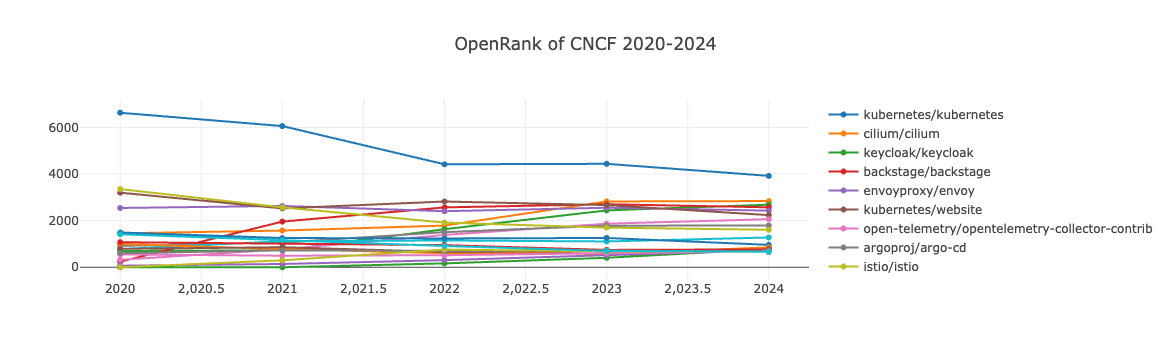

In [16]:
processTechFieldData(':foundations/linux_foundation/cncf', 'CNCF');

### lfai

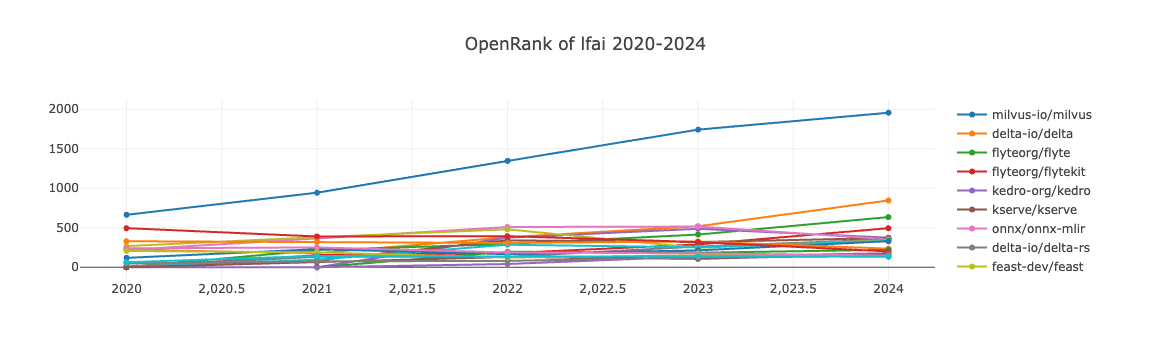

In [17]:
processTechFieldData(':foundations/linux_foundation/lfai', 'lfai');

### OpenAtom

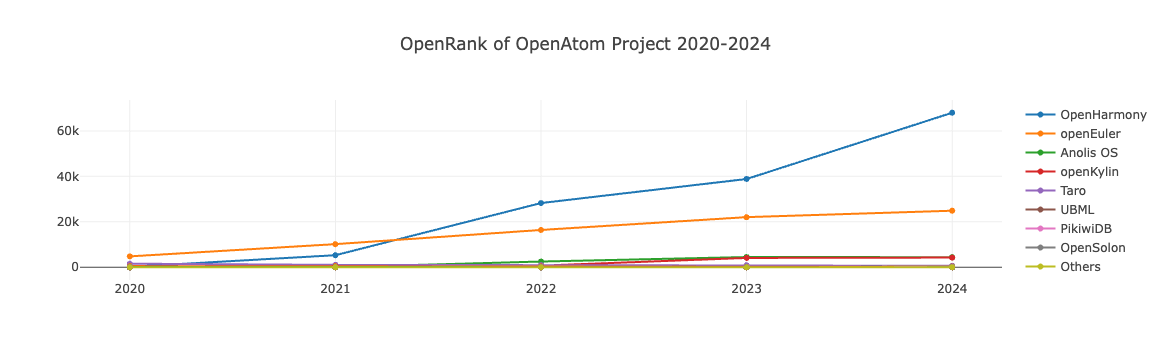

In [18]:
openDigger.index.openrank.getRepoOpenrank({
    labelUnion: [':foundations/openatom'],
    startYear: 2020, endYear: 2024, endMonth: 12,
    groupBy: 'Project',
    groupTimeRange: 'year',
    order: 'DESC',
    limit: -1
}).then(data => {
    // var data = data.filter(i => i.id.startsWith(':technology'));
    openDigger.render.plotly(data.map(row => {
        return {
            x: years,
            y: row.openrank,
            name: row.name
        };
    }), {title: `OpenRank of OpenAtom Project 2020-2024`, xaxis: { type: 'category' }});
})

### Apache

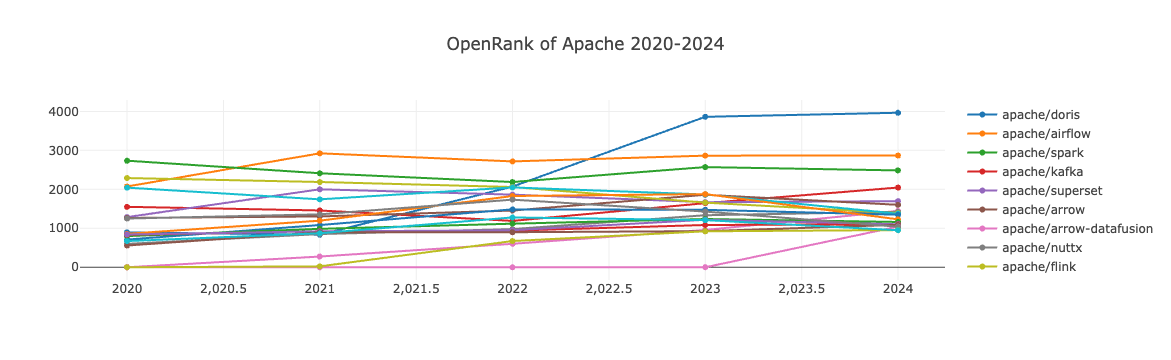

In [19]:
processTechFieldData(':foundations/apache', 'Apache');

### Eclipse

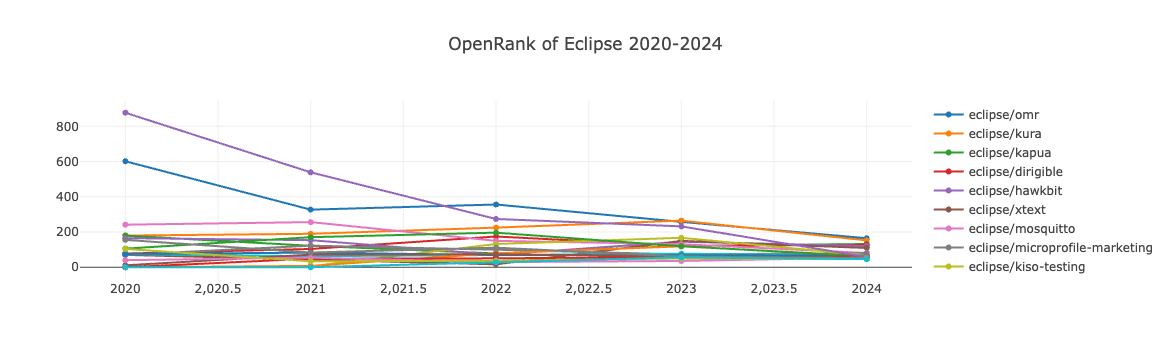

In [20]:
processTechFieldData(':foundations/eclipse', 'Eclipse');

### OpenInfra

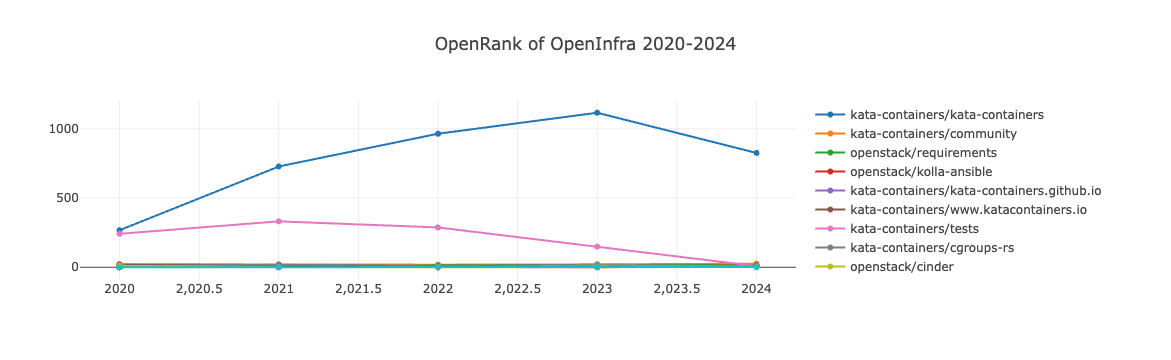

In [21]:
processTechFieldData(':foundations/openinfra', 'OpenInfra');

### OpenJs

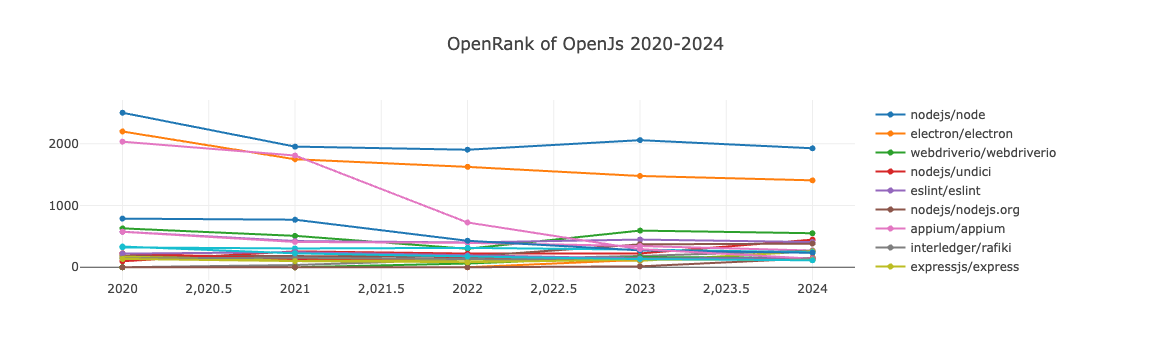

In [22]:
processTechFieldData(':foundations/linux_foundation/openjs', 'OpenJs');